In [1]:
!pip install pymatgen
!pip install mp_api
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element
from pymatgen.core.structure import Structure
import pandas as pd
import numpy as np
import plotly as pt
import seaborn as sns
import requests
import json
import os
import plotly.express as px

In [3]:
df = pd.read_excel("/content/drive/MyDrive/University/Artificial intelligence in chemistry/Perovskite project/Perovskite-liked-oxides-bandgap-prediction/Data/Perovskite dataset.xlsx",sheet_name='Export')

In [4]:
df

,Perovskite,Hill formula,Interlayer space composition,Dopant,"Dopant, wt%","Bandgap, eV",DOI,Materials Project ID,COD_ID,Springer_ID,...,MP_packing_fraction,COD_packing_fraction,Springer_packing_fraction,Oxygen_count,Oxygen_concentration_MP,Oxygen_concentration_COD,Oxygen_concentration_Springer,Valence Electrons Density,Oxygen_concentration,Packing fraction
0,K4Nb6O17,K4 Nb6 O17,NaN,NaN,NaN,3.50,10.1007/BF00765319,mp-560692,1001842,NaN,...,0.482644,0.507705,NaN,17.0,0.038482,0.040481,NaN,0.078963,0.039481,0.495174
1,KLaNb2O7,K La Nb2 O7,NaN,NaN,NaN,3.20,10.1007/BF00765319,mp-1223501,1545643,NaN,...,0.484504,NaN,NaN,7.0,0.040335,0.021337,NaN,0.061673,0.030836,0.484504
2,RbLaNb2O7,La Nb2 O7 Rb,NaN,NaN,NaN,3.35,10.1007/BF00765319,mp-553965,-1,NaN,...,0.507344,NaN,NaN,7.0,0.040114,NaN,NaN,0.080227,0.040114,0.507344
3,CsLaNb2O7,Cs La Nb2 O7,NaN,NaN,NaN,3.30,10.1007/BF00765319,mp-553248,2004917,NaN,...,0.524329,0.552752,NaN,7.0,0.038958,0.041070,NaN,0.080028,0.040014,0.538540
4,KCa2Nb3O10,Ca2 K Nb3 O10,NaN,NaN,NaN,3.35,10.1007/BF00765319,mp-557195,1521061,NaN,...,0.505552,0.000000,NaN,10.0,0.043255,0.045288,NaN,0.088543,0.044272,0.252776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,KCa2Nb3O10,K Ca2 Nb3 O10,NaN,NaN,NaN,3.50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
520,KCa2Nb2TaO10,K Ca2 Nb2 Ta O10,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,0.045288,NaN,0.090577,0.045288,0.000000
521,KCa2NbTa2O10,K Ca2 Nb Ta2 O10,NaN,NaN,NaN,3.80,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
522,KCa2Ta3O10,K Ca2 Ta3 O10,NaN,NaN,NaN,4.20,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [5]:
df.columns


Index(['Perovskite', 'Hill formula', 'Interlayer space composition', 'Dopant',
       'Dopant, wt%', 'Bandgap, eV', 'DOI', 'Materials Project ID', 'COD_ID',
       'Springer_ID', 'Z', 'Z_MP', 'Z_COD', 'Z_Springer', 'a, A', 'b, A',
       'c, A', 'Symmetry group', 'd,A', 'a_MP', 'b_MP', 'c_MP', 'a_COD',
       'b_COD', 'c_COD', 'a_Springer', 'b_Springer', 'c_Springer',
       'Number of octahedrons on a layer', 'Valence electrons', 'Volume',
       'Volume_MP', 'Volume_COD', 'Volume_Springer',
       'Valence Electrons Density_MP', 'Valence Electrons Density_COD',
       'Springer_Valence Electrons Density', 'avg s valence electrons',
       'avg p valence electrons', 'avg d valence electrons',
       'avg f valence electrons', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'MagpieData minimum Electronegativity',
       'MagpieData maximum Electronegativity',
       'MagpieData range Electronegativity',
     

In [6]:
df['Valence Electrons Density'] = df['Valence Electrons Density'].replace(0, np.nan)

In [7]:
df['Oxygen_concentration'] = df['Oxygen_concentration'].replace(0, np.nan)

In [9]:
df['Packing fraction'] = df['Packing fraction'].replace(0, np.nan)

In [10]:
df['Average Mulliken electronegativity'] = df['Average Mulliken electronegativity'].replace(0, np.nan)

In [11]:
required_colimns = ['Bandgap, eV', 'avg s valence electrons',
       'avg p valence electrons', 'avg d valence electrons',
       'avg f valence electrons', 'frac s valence electrons',
       'frac p valence electrons', 'frac d valence electrons',
       'frac f valence electrons', 'MagpieData minimum Electronegativity',
       'MagpieData maximum Electronegativity',
       'MagpieData range Electronegativity',
       'MagpieData mean Electronegativity',
       'Average Mulliken electronegativity', 'Valence Electrons Density',
       'Oxygen_concentration', 'Packing fraction']

In [12]:
df_required_columns = df[required_colimns].copy()

In [14]:
df_required_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Bandgap, eV                           524 non-null    float64
 1   avg s valence electrons               519 non-null    float64
 2   avg p valence electrons               519 non-null    float64
 3   avg d valence electrons               519 non-null    float64
 4   avg f valence electrons               519 non-null    float64
 5   frac s valence electrons              519 non-null    float64
 6   frac p valence electrons              519 non-null    float64
 7   frac d valence electrons              519 non-null    float64
 8   frac f valence electrons              519 non-null    float64
 9   MagpieData minimum Electronegativity  519 non-null    float64
 10  MagpieData maximum Electronegativity  519 non-null    float64
 11  MagpieData range El

In [18]:
import matplotlib.pyplot as plt
def draw_hustogram(df_, column):
  df_[column].hist(bins=20)
  plt.title(f'{column} distribution')
  plt.xlabel(f'{column}')
  plt.ylabel('Count')
  plt.show()

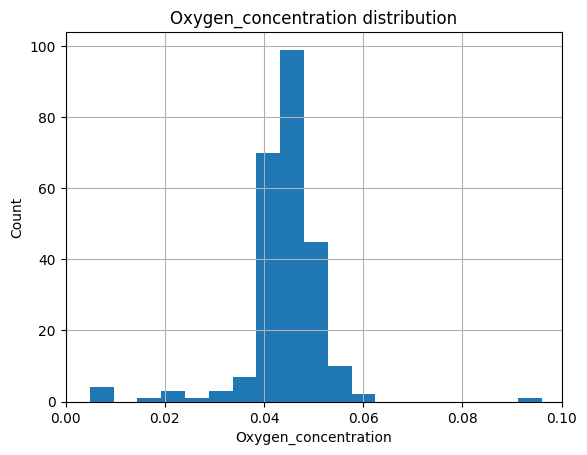

In [56]:
column='Oxygen_concentration'
df[column].hist(bins=40)
plt.title(f'{column} distribution')
plt.xlabel(f'{column}')
plt.ylabel('Count')
plt.xlim(0,0.1)
plt.show()

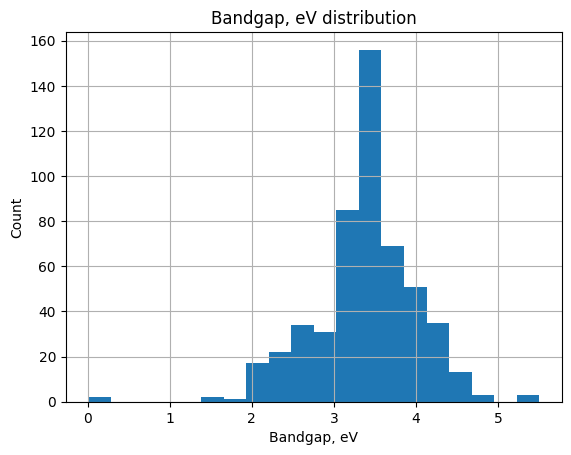

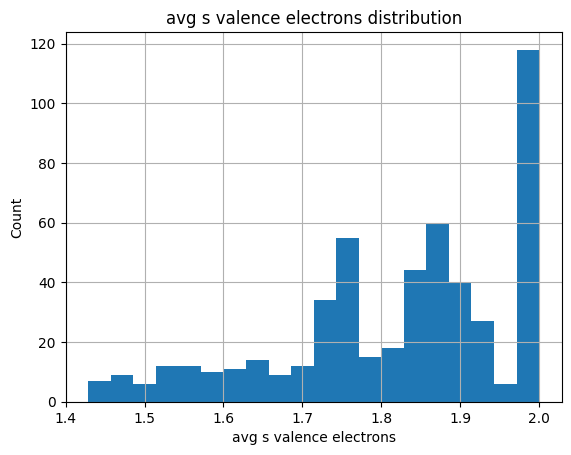

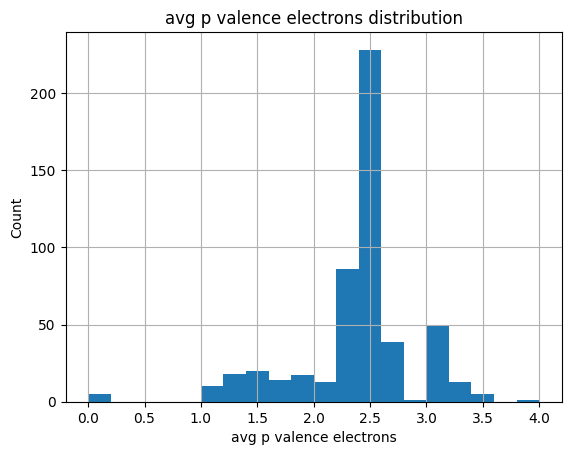

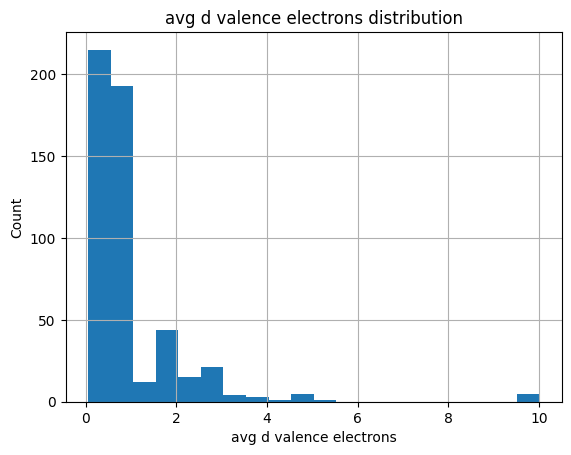

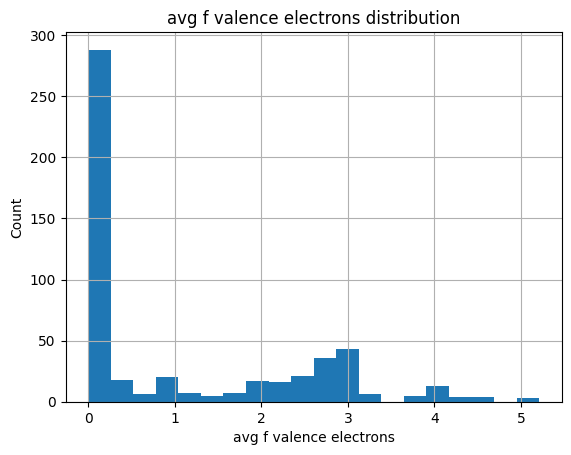

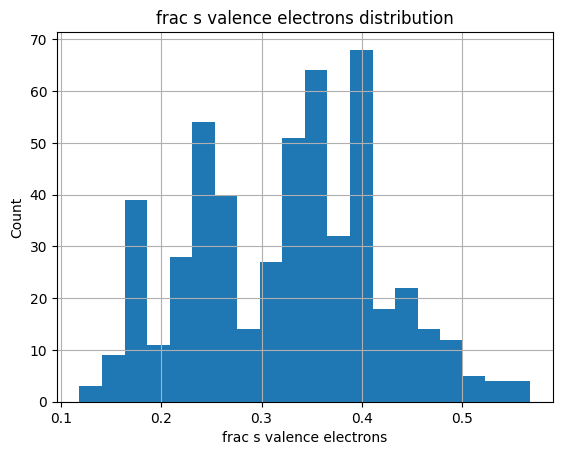

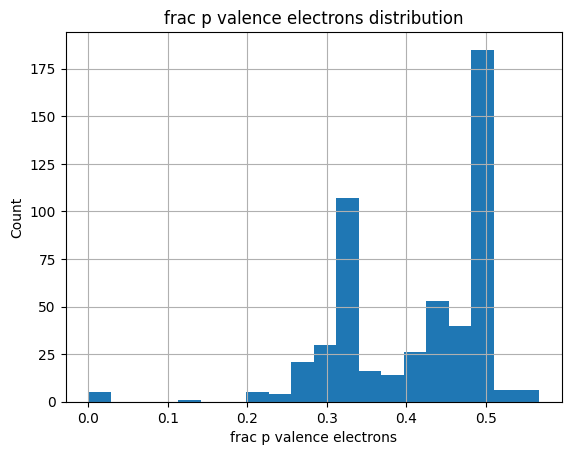

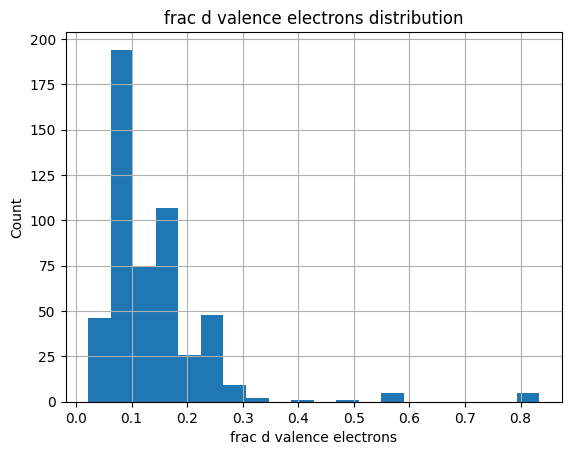

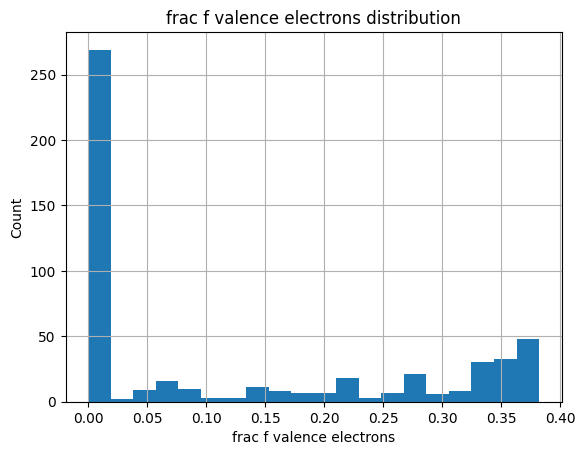

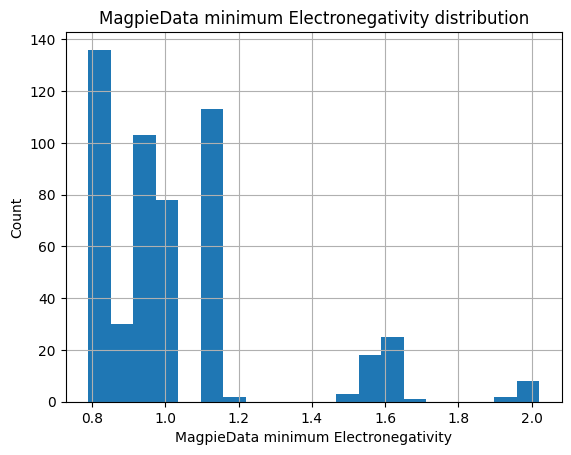

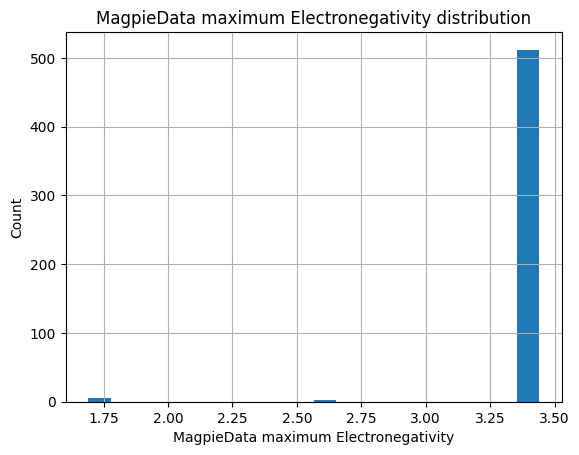

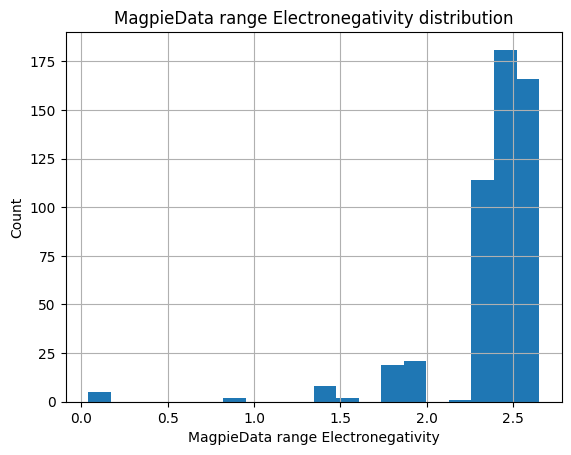

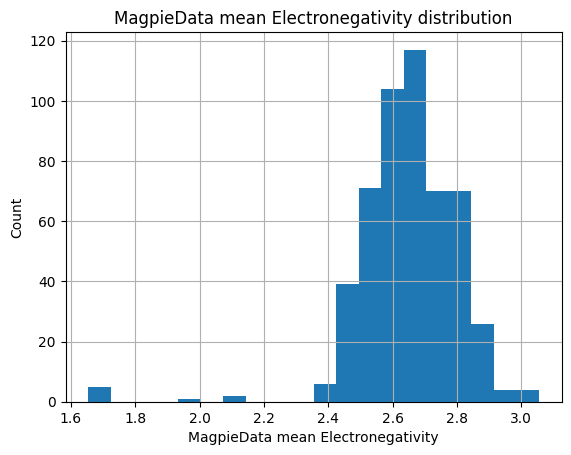

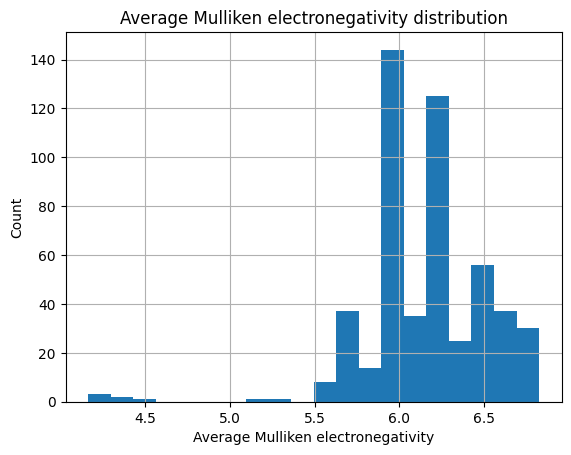

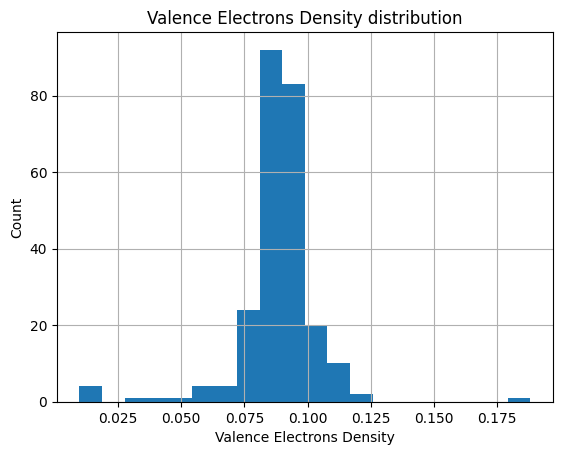

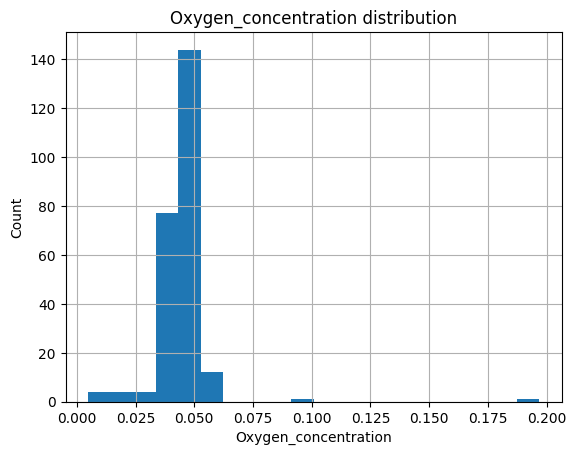

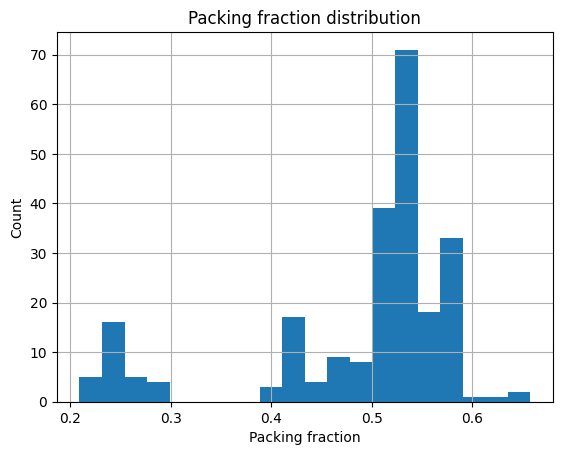

In [19]:
for column in required_colimns:
  draw_hustogram(df,column)

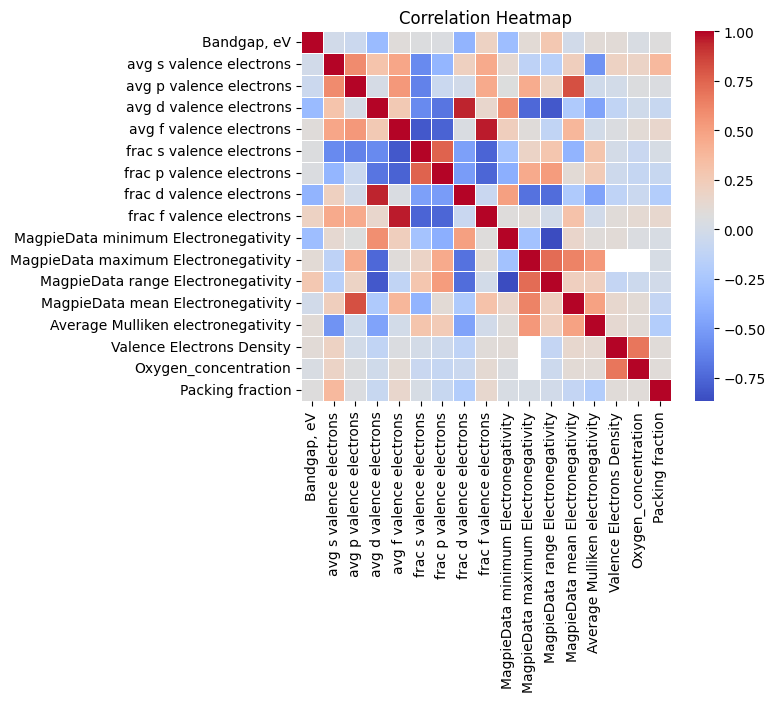

In [24]:
corr_matrix = df_required_columns.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [47]:
def cif_file_exists(MP,COD,Springer):
  print(MP," ",COD," ",Springer)
  if not(MP==-1 or MP==-2 or MP==0 ):
    return 1
  if not(COD==-1 or COD==-2 or COD==0 ):
    return 1
  return 0
  #if not(Springer==-1 or Springer==-2 or Springer==0 ):
   # return 1

In [48]:
df['CIF_exists'] = df.apply(lambda row: cif_file_exists(row['Materials Project ID'], row['COD_ID'], row['Springer_ID']), axis=1)

mp-560692   1001842   nan
mp-1223501   1545643   nan
mp-553965   -1   nan
mp-553248   2004917   nan
mp-557195   1521061   nan
mp-20396   2238958   nan
mp-581330   1518045   nan
-1   -1   nan
-1   -1   nan
mp-1245098   1010942   nan
mp-541600   -1   nan
-1   -1   sd_1050391
-1   -1   sd_1050392
-1   -1   sd_1050393
mp-554038   2002339   nan
mp-17715   1534928   nan
mp-676339   1537578   nan
mp-556848   1525923   nan
mp-554675   1521923   nan
mp-23611   1525921   nan
mp-555616   -1   nan
mp-23614   1531753   nan
mp-555867   7221049   nan
mp-23101   1531664   nan
mp-23101   1531664   nan
mp-23101   1531664   nan
mp-23101   1531664   nan
mp-23101   1531664   nan
mp-1245098   1010942   nan
mp-541600   -1   nan
-1   -1   sd_1050391
-1   -1   sd_1050392
-1   -1   sd_1050393
-1   1533576   nan
-1   -1   sd_0551678
mp-555616   -1   nan
mp-23101   1531664   nan
-1   -1   sd_1502563
-2   -1   nan
-2   -1   nan
mp-3349   1530317   nan
mp-19845   1011028   nan
mp-561133   8101224   nan
mp-3563   70

In [49]:
df['CIF_exists'].value_counts()

,count
CIF_exists,
0,282
1,242


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Perovskite                            524 non-null    object 
 1   Hill formula                          524 non-null    object 
 2   Interlayer space composition          3 non-null      object 
 3   Dopant                                53 non-null     object 
 4   Dopant, wt%                           42 non-null     float64
 5   Bandgap, eV                           524 non-null    float64
 6   DOI                                   519 non-null    object 
 7   Materials Project ID                  519 non-null    object 
 8   COD_ID                                519 non-null    object 
 9   Springer_ID                           38 non-null     object 
 10  Z                                     14 non-null     float64
 11  Z_MP               